In [1]:
from ecotools.pi_client import pi_client
pi = pi_client(username = r'ad3\sbharadw')

ad3\sbharadw, please provide your password (text will be hidden) 
>>········
save password? [y/n] /n after saving, set username = 'file' to use this feature 
>>y


In [2]:
tag = pi.search_by_point(['aiTIT4045'])
data = pi.get_stream_by_point(tag, start='2021-01-01', end='2021-02-01', interval='1h', calculation='summary')

14:33:40: Sending API request... Chunk 1 of 1
14:33:40: Response recieved for 1 tags! (0.5)


In [3]:
import sys
print(sys.path)

['/Users/sanab/Desktop/eco-tools/notebooks/mnv', '/Users/sanab/opt/anaconda3/lib/python38.zip', '/Users/sanab/opt/anaconda3/lib/python3.8', '/Users/sanab/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/sanab/.local/lib/python3.8/site-packages', '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages', '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/sanab/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/sanab/.ipython']


### Local Data Loading

In [4]:
# file_path = 'data/pes kbtu.xlsx'
# data = pd.read_excel(file_path, header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
# print(data.columns)

### PI Data Loading

In [5]:
# pi = pi_client(username=r'ad3\sbharadw')
tags = pi.search_by_point(['*grove*kbtu'])

tags

['TheGrove_ChilledWater_Demand_kBtu',
 'TheGrove_Steam_Demand_kBtu',
 'The_Grove_Electricity_Demand_kBtu']

In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from ecotools.pi_client import pi_client
from ecotools import mnv

print(mnv.version)  # Last updated for mnv v2.0.1

ad3\sbharadw, please provide your password (text will be hidden) 
>>········
save password? [y/n] /n after saving, set username = 'file' to use this feature 
>>y
Version 2.0.1


In [7]:
tags = 'The_Grove_Electricity_Demand_kBtu'

#### Pull tags

In [8]:
start = '2019-02-16'
end = '2021-02-16'
interval = '1h' # Can be "min" "h" "d"
calculation = 'summary'
weight = 'TimeWeighted'

data = pi.get_stream_by_point(tags, start=start, end=end, interval=interval, calculation=calculation, _weight=weight)

print(data.head())

14:33:55: Sending API request... Chunk 1 of 1
14:33:56: Response recieved for 1 tags! (0.66)
                     The_Grove_Electricity_Demand_kBtu
Timestamp                                             
2019-02-16 00:00:00                         298.425765
2019-02-16 01:00:00                         291.937232
2019-02-16 02:00:00                         284.754978
2019-02-16 03:00:00                         282.909911
2019-02-16 04:00:00                         297.113041


# Data Section

In [9]:
# dataParams [do not edit line]
dataParams = {'column': 0,
              'IQRmult' : 3.0,
              'IQR' : False,
              'floor': -1,
              'ceiling': 40000000,
              'resample_rate' : 'D', #'D' for daily 'H' for hourly
              'oat_source' : 'pi', #'self' or 'file' or 'pi'
              'oat_name' : 'aiTIT4045', #Name of OAT column if OATsource is 'self'
              'slice_type' : 'ranges', #half, middate, ranges
              'mid_date' : '2017-01-01', #only needed with sliceType : 'middate'
              'date_ranges' : ['2019-02-16', '2020-02-16', '2020-02-17', '2021-04-01'], #only needed with sliceType : 'ranges'
             }

### Data Cleaning

"0 days 01:00:00" is 60.0 min
14:34:01: Sending API request... Chunk 1 of 1
14:34:02: Response recieved for 1 tags! (0.68)



/Users/sanab/.local/lib/python3.8/site-packages/ecotools/ecotools/_ecotools.py:544: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.week


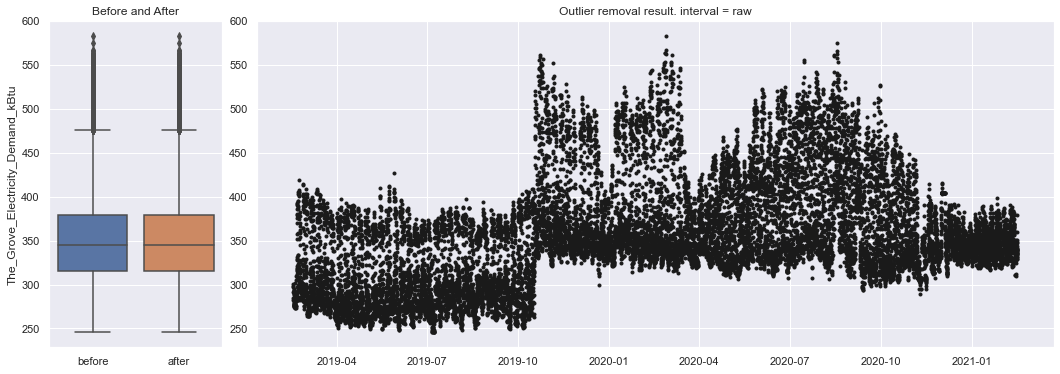

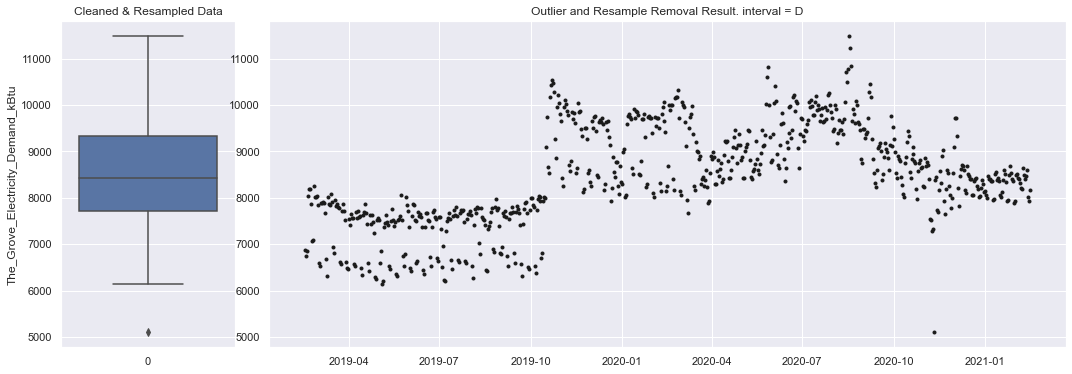

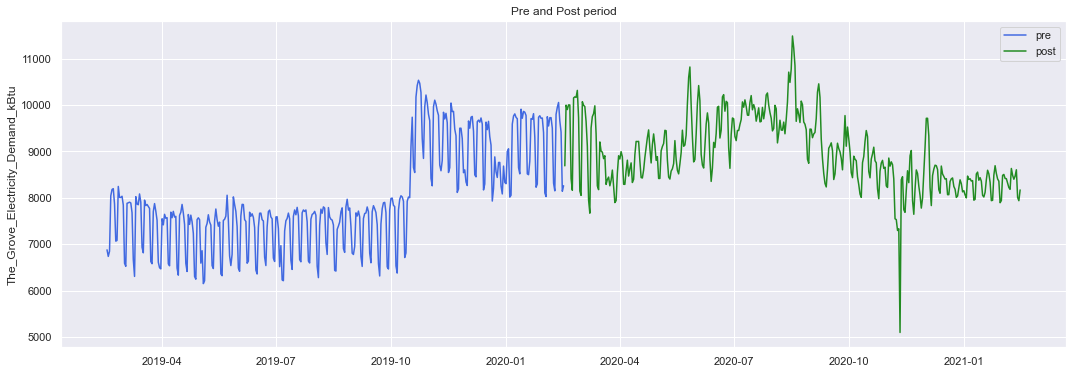

In [10]:
dk = mnv.data_keeper(data, dataParams)
dk.default_clean()

# Plots
dk.outlier_plot()
dk.resampled_plot()
dk.pre_post_plot()

# Modeling Section

In [13]:
# modelParams [do not edit line]
modelParams = {'var': ['CDH', 'HDH', 'C(weekday)'],
               'train_test_split': 'random',
               'random_state': 4291990,  #Good idea to use a seed value so folds consitent between runs
               'test_size': 0.20,
               'var_combinations': [['', 'CDH', 'CDH2'], ['', 'HDH', 'HDH2'], '', 'C(weekday)', 'C(month)']
              }

In [14]:
dk.pre 

,The_Grove_Electricity_Demand_kBtu,HDH,CDH,HDH2,CDH2,year,month,dayofmonth,hour,minute,dayofweek,weekofyear,daytime,weekday,saturday,sunday
Timestamp,,,,,,,,,,,,,,,,
2019-02-16,6881.149529,384.300150,0.000000,6709.236024,0.000000,2019,2,16,0,0,5,7,0,0,1,0
2019-02-17,6740.106272,470.942134,0.000000,9519.566389,0.000000,2019,2,17,0,0,6,7,0,0,0,1
2019-02-18,6851.546830,442.395782,0.000000,8660.784867,0.000000,2019,2,18,0,0,0,8,0,1,0,0
2019-02-19,8044.376607,424.408497,0.000000,8199.506463,0.000000,2019,2,19,0,0,1,8,0,1,0,0
2019-02-20,8181.753841,381.933033,0.000000,6690.628173,0.000000,2019,2,20,0,0,2,8,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-12,10056.131977,208.951453,8.025635,2882.384341,17.337435,2020,2,12,0,0,2,7,0,1,0,0
2020-02-13,9658.035708,289.528849,1.040649,4694.736017,0.543852,2020,2,13,0,0,3,7,0,1,0,0
2020-02-14,9419.075550,312.703900,0.000000,5651.676144,0.000000,2020,2,14,0,0,4,7,0,1,0,0


### Many Linear Models

Entering run_all_linear()...

... run_all_linear() complete
        AIC       AR2        R2     cvrmse post_diff  \
30  4420.26  0.650698  0.814334  0.0580601   -356323   
22  4422.15  0.649683  0.814322   0.058062   -355502   
10  4422.17  0.649709  0.814337  0.0580596   -355470   
34   4424.2  0.645943  0.811513  0.0584995   -360032   
14  4425.18   0.64589  0.812079  0.0584116   -356930   

                                   var  
30         HDH + C(weekday) + C(month)  
22  CDH2 + HDH + C(weekday) + C(month)  
10   CDH + HDH + C(weekday) + C(month)  
34        HDH2 + C(weekday) + C(month)  
14  CDH + HDH2 + C(weekday) + C(month)  


/Users/sanab/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


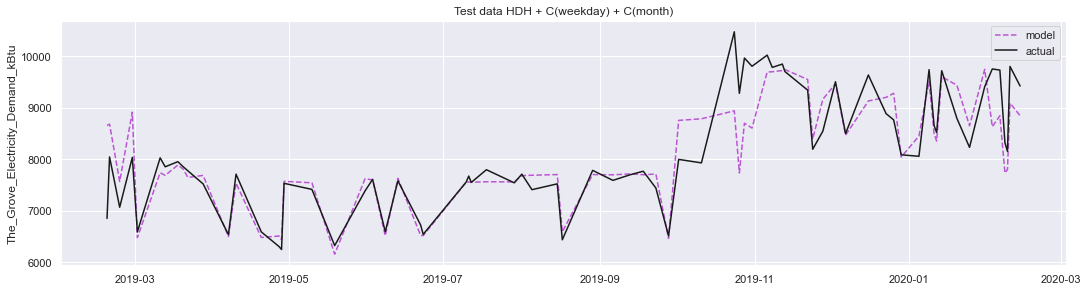

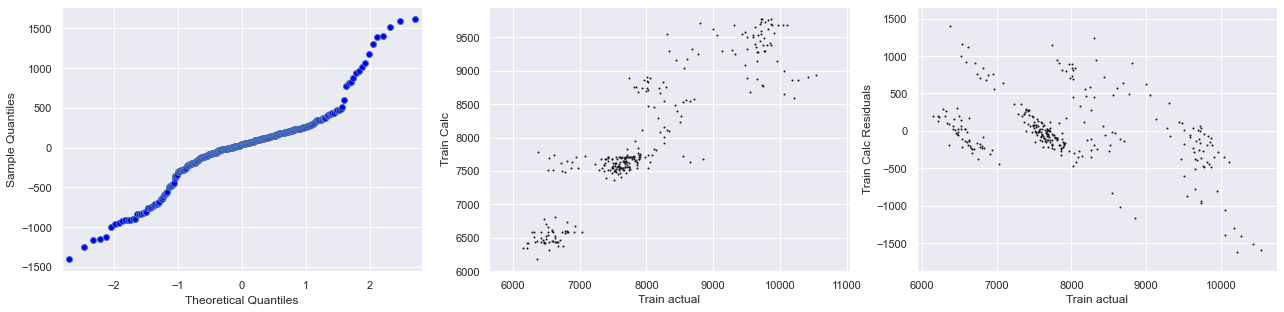

/Users/sanab/.local/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


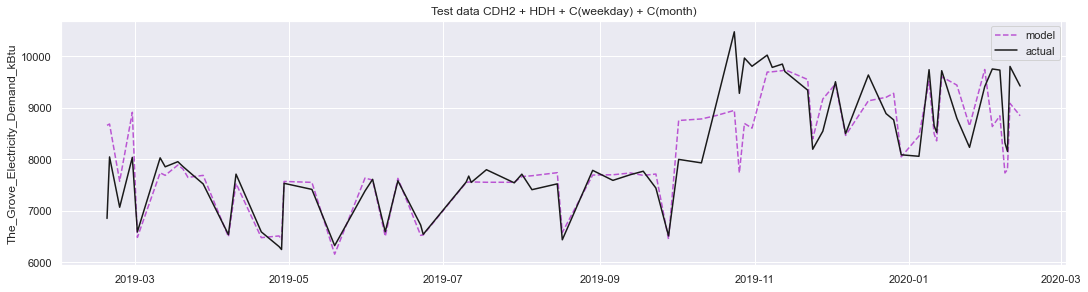

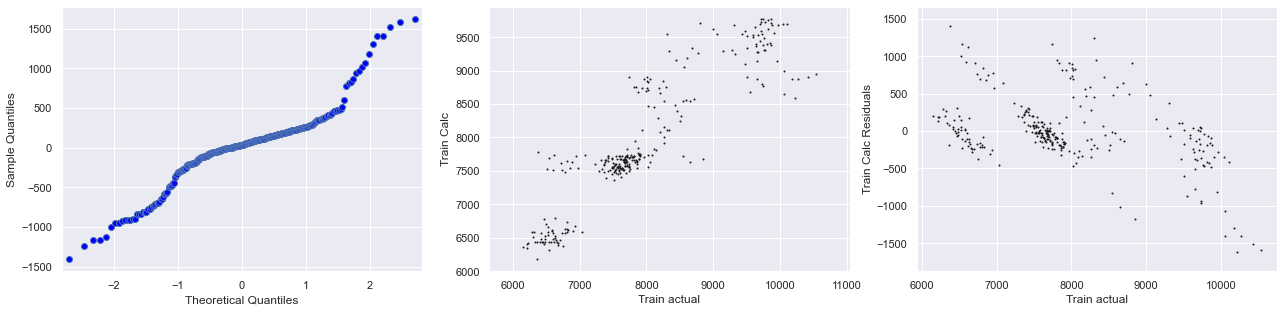

In [15]:
# Run All Linear [do not edit line]
allmod = mnv.many_ols(dk.pre, dk.post, modelParams)
allmod.run_all_linear()

print(allmod.stats_pool[0:5])  # Display top stats
allmod.plot_pool(2)  # Visualize top models
# Set the modelParam "var" to the 'best' model from run_all_linear()
modelParams['var'] = allmod.stats_pool.iloc[0]['var']

### Single Linear Model

             VIF
const  41.731427

Kfold
        AR2            mse  pct. of mean
3  0.819281  209528.848296     95.035627
0  0.815504  209663.187279     95.096559
1  0.804886  218767.340148     99.225913
4  0.808333  227493.391516    103.183773
2  0.799016  236917.126976    107.458080


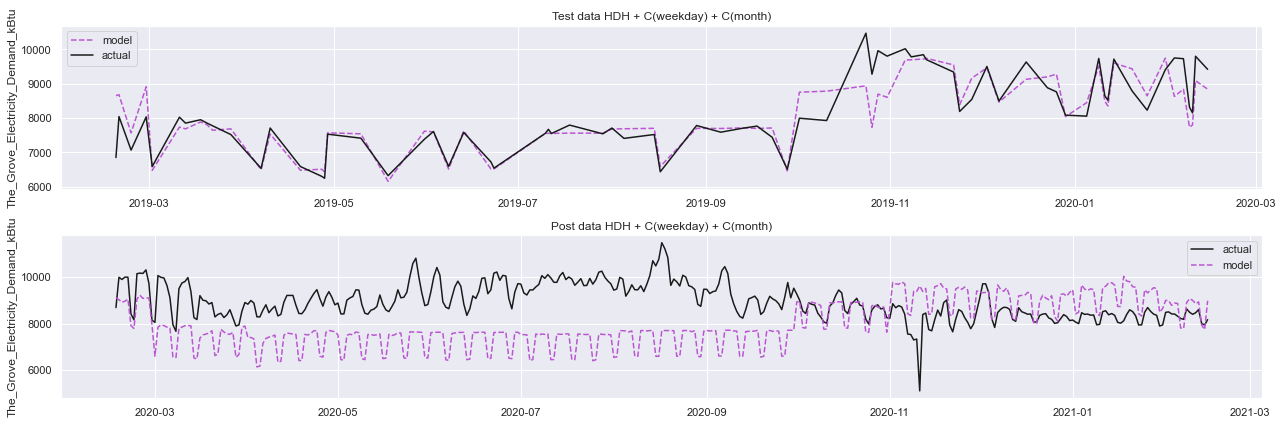

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     The_Grove_Electricity_Demand_kBtu   R-squared:                       0.824
Model:                                           OLS   Adj. R-squared:                  0.816
Method:                                Least Squares   F-statistic:                     99.94
Date:                               Mon, 18 Oct 2021   Prob (F-statistic):           1.37e-96
Time:                                       14:34:29   Log-Likelihood:                -2196.1
No. Observations:                                292   AIC:                             4420.
Df Residuals:                                    278   BIC:                             4472.
Df Model:                                         13                                         
Covariance Type:                           nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8980.2574    181.711     49.421      0.000    8622.554    9337.961
C(weekday)[T.1]  1109.6771     59.821     18.550      0.000     991.918    1227.437
C(month)[T.2]    -790.2834    143.828     -5.495      0.000   -1073.413    -507.154
C(month)[T.3]   -2010.3503    144.872    -13.877      0.000   -2295.535   -1725.165
C(month)[T.4]   -2383.9591    171.763    -13.879      0.000   -2722.080   -2045.838
C(month)[T.5]   -2448.4821    166.991    -14.662      0.000   -2777.209   -2119.755
C(month)[T.6]   -2460.7477    192.010    -12.816      0.000   -2838.726   -2082.769
C(month)[T.7]   -2527.2418    190.882    -13.240      0.000   -2902.999   -2151.485
C(month)[T.8]   -2387.8324    193.729    -12.326      0.000   -2769.195   -2006.470
C(month)[T.9]   -2374.9913    189.317    -12.545      0.000   -2747.669   -2002.313
C(month)[T.10]  -1151.5524    170.221     -6.765      0.000   -1486.637    -816.468
C(month)[T.11]   -171.1783    146.007     -1.172      0.242    -458.599     116.242
C(month)[T.12]   -290.0445    132.777     -2.184      0.030    -551.421     -28.668
HDH                -1.4595      0.397     -3.675      0.000      -2.241      -0.678
==============================================================================
Omnibus:                       21.586   Durbin-Watson:                   0.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.414
Skew:                           0.146   Prob(JB):                     5.13e-16
Kurtosis:                       5.388   Cond. No.                     3.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
modelParams['commodity_rate'] = (0.071/3.412)

mod = mnv.ols_model(dk.pre, dk.post, modelParams)
mod.calculate_kfold()
mod.calculate_vif()

print(mod.vif[mod.vif['VIF'] > 5])

print('\nKfold')
print(mod.kfold_stats)

mod.model_plot()
plt.show() # Show plot before Stats summary
mod.Fit.summary()

# Savings

          Energy Savings Dollar Savings       Start         End
Actual           -356323       -7414.69  2020-02-17  2021-02-15
Predicted        -349905       -7281.14  2019-02-16  2020-02-16


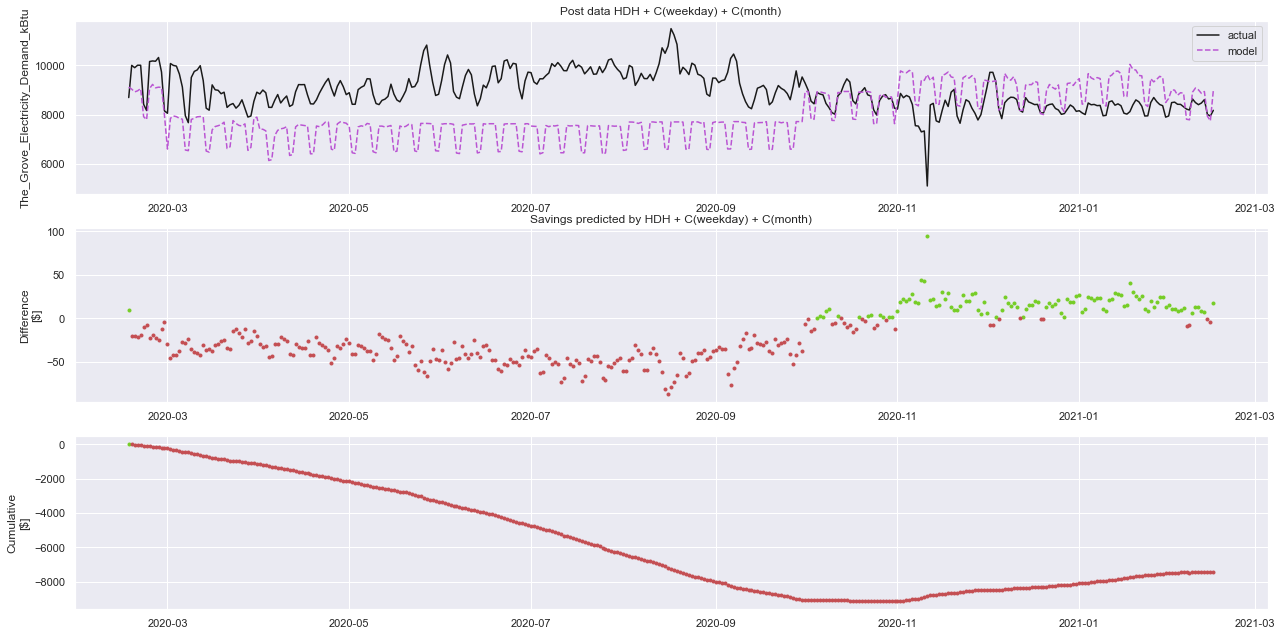

In [17]:
mod.generate_savings_summary(prediction='pre')
print(mod.savings_summary)

mod.savings_plot(yaxis='dollars')
mod.calculate_F_uncertainty()

<AxesSubplot:xlabel='Timestamp'>

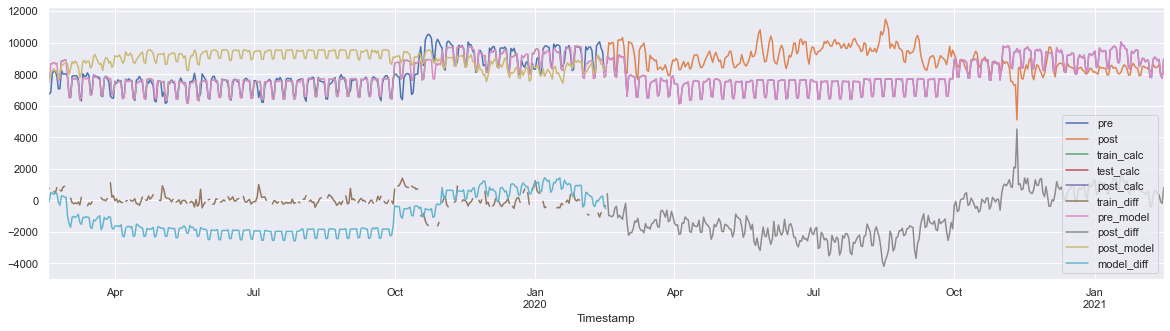

In [18]:
mod.data.plot(figsize=(20,5))

### Creating an Archive

#### Make sure to save (Ctrl + S !) before running this cell !

In [89]:
# Create Archive [do not edit line]
## Only run this section when you're confident in the model and wish to save it
import nbformat
from ecotools.mnv.archive import airtable_archive, remove_nb_outputs

notebook_data = nbformat.read(fp="MnV Tool.ipynb", as_version=4)

remove_nb_outputs(notebook_data)
airtable_archive(dk, mod, notebook=notebook_data, airtable_data={})